## Import

In [1]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 20.7 MB/s eta 0:00:00


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [3]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [4]:
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [5]:
import numpy as np
import scipy.stats as stats
from sklearn.metrics import pairwise_distances
import zlib
import string

In [6]:
#funzione per stampare num di elementi in ogni cluster
def element_per_cluster(lab):
  labels = {}
  for c in lab:
    if c not in labels.keys():
      labels[c] = list()
    labels[c].append(c)

  for l in labels:
    print("Numero di elementi in cluster", l, ": ", len(labels[l]))

# Data Preparation

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# define directory path
directory = "drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Time Series/DATASET/"

# import ts data
df_train_PAA = pd.read_csv(directory + "Approximated/ts_data_TRAIN_PAA.csv", index_col="Unnamed: 0")
df_train_100 = pd.read_csv(directory + "Approximated/ts_data_TRAIN_100_PAA.csv", index_col="Unnamed: 0")

# get ts values
X_train = df_train_PAA.values
X_train_100 = df_train_100.values


In [9]:
df_train_100.head()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,-0.007860,-0.008146,-0.008659,-0.007632,-0.007227,-0.008127,-0.009839,-0.015116,-0.008804,-0.007422,...,-0.006386,-0.003497,-0.011305,-0.006664,-0.003221,-0.000396,-0.005701,0.001121,-0.010392,-0.013113
1,-0.005102,-0.005012,-0.005578,-0.010565,-0.007533,-0.005123,-0.005097,-0.010171,-0.006459,-0.001645,...,-0.005762,-0.006871,-0.013754,-0.015744,-0.005502,-0.005699,-0.003793,-0.007646,-0.007781,-0.007696
2,-0.022457,-0.016185,0.003574,-0.002929,-0.013468,-0.018545,-0.011020,-0.008867,-0.000014,-0.001922,...,-0.011370,-0.010838,-0.006335,-0.006346,-0.007001,-0.007370,-0.006663,-0.005665,-0.006907,-0.007361
3,-0.010459,-0.011198,-0.006793,-0.003479,-0.010482,-0.008782,-0.014827,-0.009550,-0.012215,-0.001630,...,-0.009548,-0.005641,-0.004813,-0.006326,-0.006576,-0.007893,-0.007171,-0.005052,-0.001802,-0.001579
4,-0.000205,0.001572,0.001311,-0.001368,0.002887,-0.007043,-0.000175,-0.004795,-0.006339,-0.003808,...,-0.010540,0.022087,0.021372,0.002508,0.020995,-0.012354,-0.010221,-0.005544,-0.007610,-0.014680


In [10]:
len(X_train_100)

1828

In [ ]:
X_train_100.T

array([[-0.00785981, -0.0051015 , -0.02245744, ...,  0.00427287,
         0.00170408,  0.00166265],
       [-0.00814595, -0.00501171, -0.0161845 , ...,  0.00423765,
         0.00172005,  0.00327632],
       [-0.0086589 , -0.00557772,  0.00357355, ...,  0.00423644,
         0.00168257, -0.00308025],
       ...,
       [ 0.00112127, -0.00764592, -0.00566465, ...,  0.01146164,
        -0.00091087,  0.00236432],
       [-0.01039247, -0.00778087, -0.00690696, ...,  0.00211316,
         0.01431546, -0.01320324],
       [-0.01311264, -0.00769615, -0.0073612 , ...,  0.00134482,
         0.00493579, -0.00905603]])

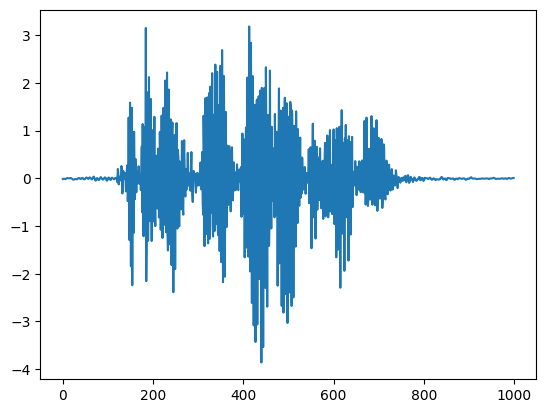

In [ ]:
plt.plot(X_train[0])
plt.show()

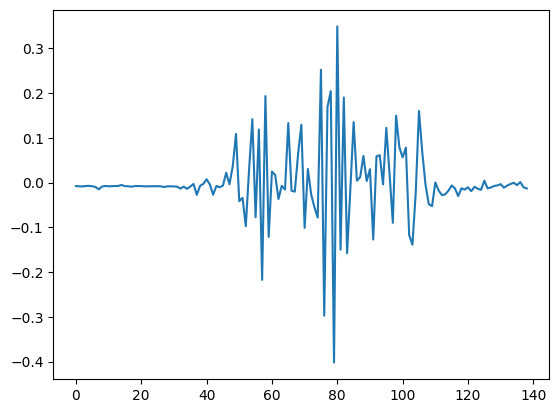

In [ ]:
plt.plot(X_train_100[0])
plt.show()

# Shape-based Clustering

In [ ]:
X_train_100.shape

(1828, 139)

In [ ]:
np.squeeze(X_train_100).shape

(1828, 139)

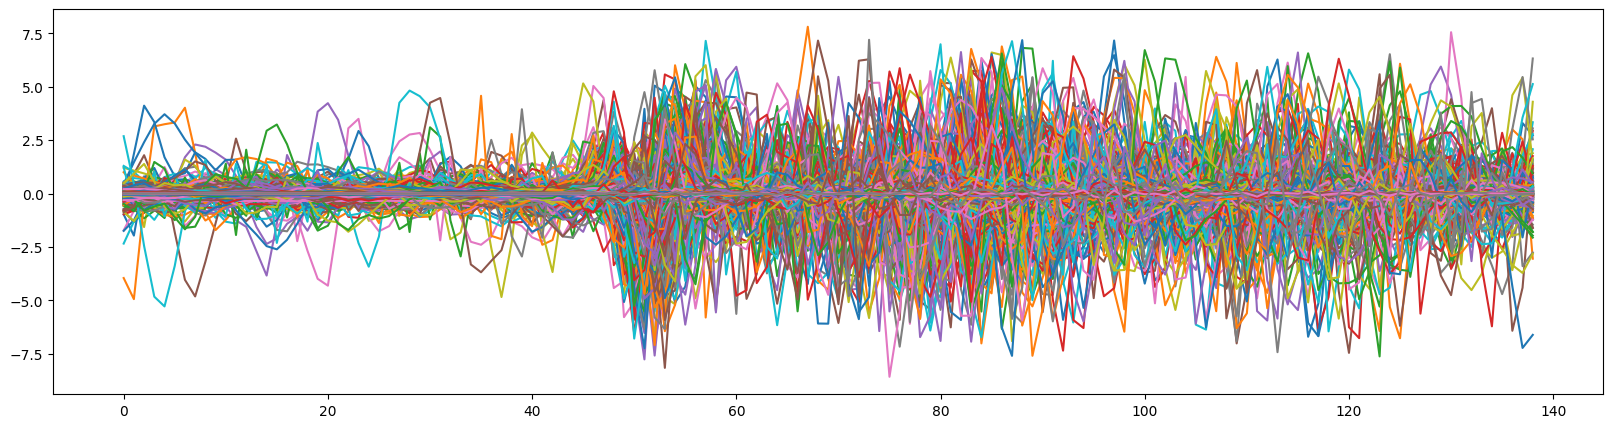

In [ ]:
#stampo tutte le time series del dataset con 100 features
plt.figure(figsize=(20,5))
plt.plot(np.squeeze(X_train_100).T)
plt.show()

## TSKM con Euclidean distance



8 cluster, dataset da 1000

In [ ]:
#imposto il clustering

km = TimeSeriesKMeans(n_clusters=8, #scelgo 8 per il numero di classi delle emozioni
                      metric="euclidean",
                      max_iter=100,
                      random_state=0)
km.fit(X_train)

TimeSeriesKMeans(max_iter=100, n_clusters=8, random_state=0)

In [ ]:
km.cluster_centers_.shape

(8, 1000, 1)

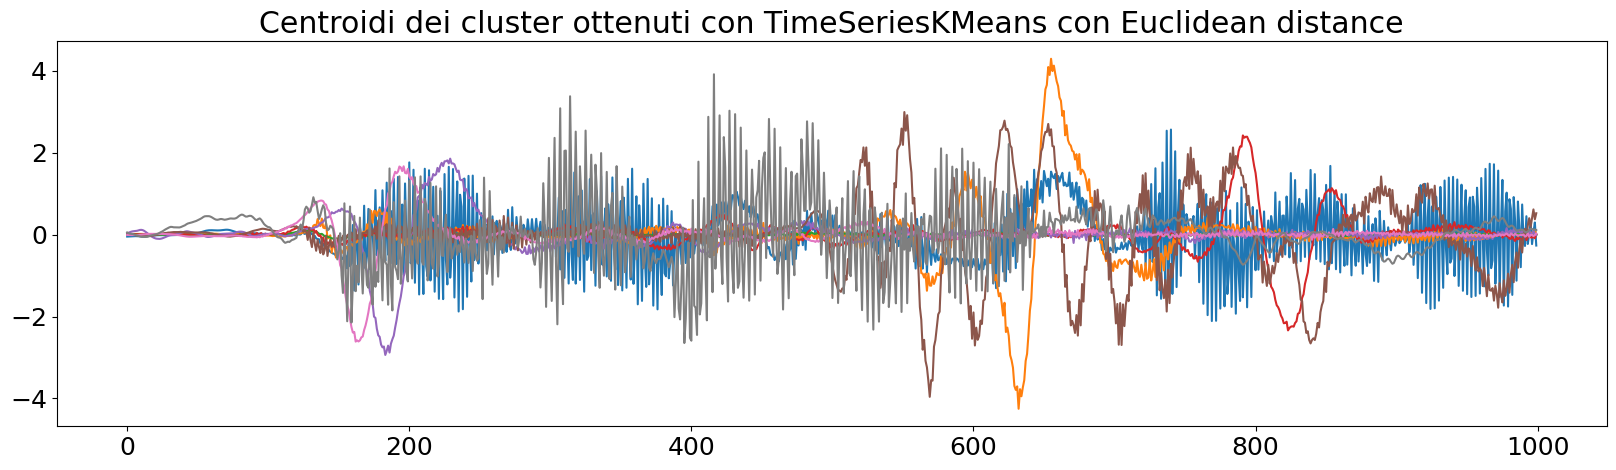

In [ ]:
#stampo i centroidi di ogni cluster
plt.figure(figsize=(20,5))
plt.rcParams['font.size'] = 18
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.title("Centroidi dei cluster ottenuti con TimeSeriesKMeans con Euclidean distance")
plt.savefig("tskm_euclidean_centers.pdf")

In [ ]:
#inertia è la somma delle distanze degli esempi dal loro centroide più vicino
km.inertia_

449.14405800061644

Visualizzo con PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [ ]:
X_train_pca.shape

(1828, 2)

In [ ]:
#fitto per la rappresentazione con PCA
labels_pca = km.fit_predict(X_train_pca)

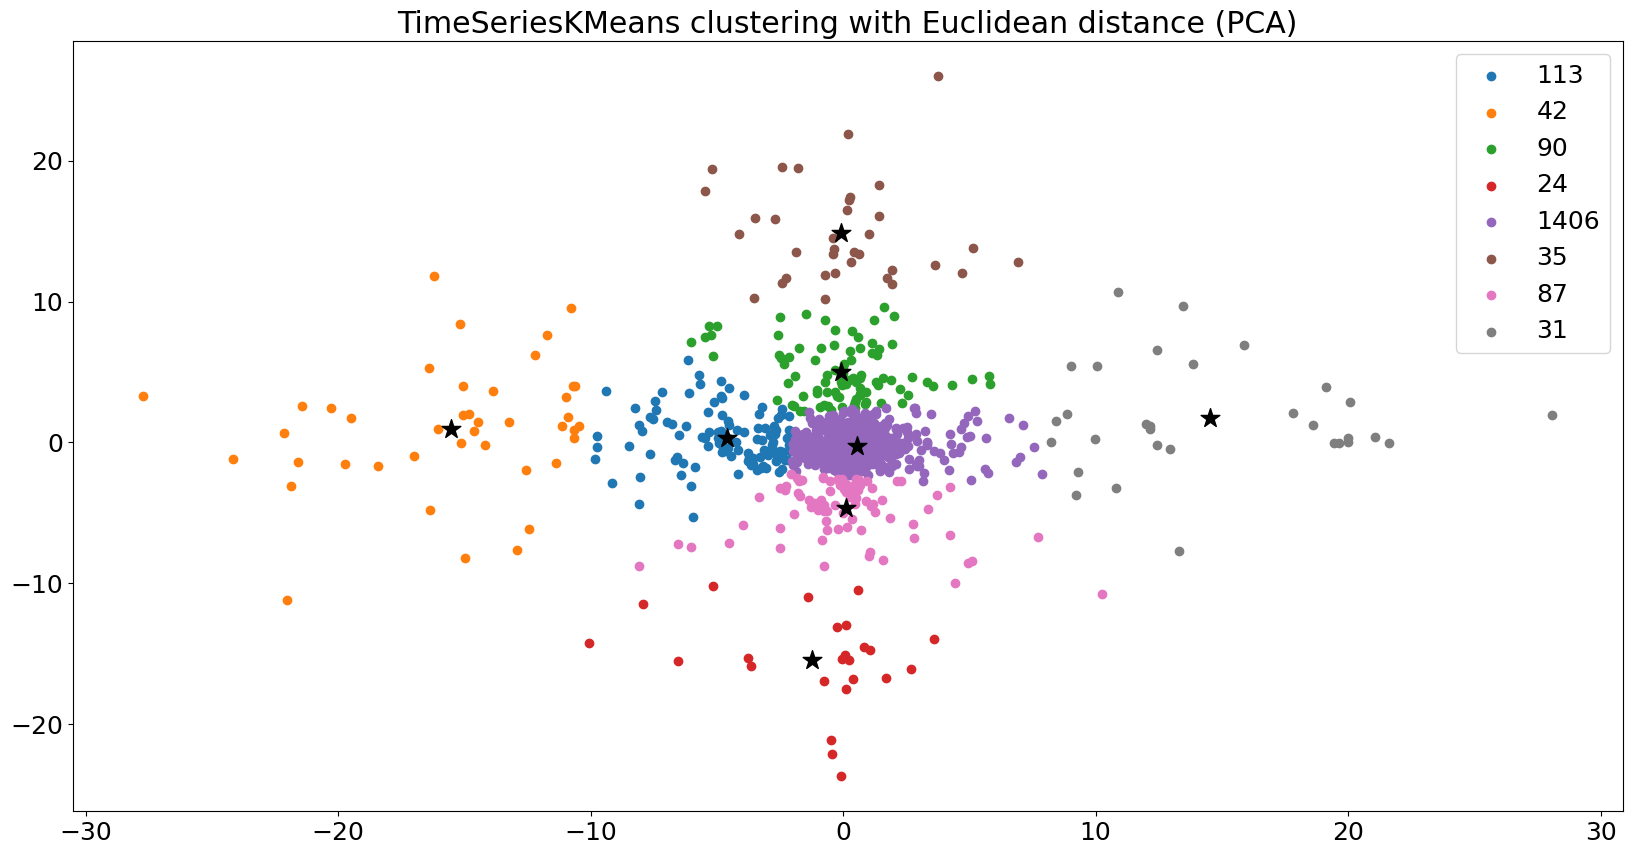

In [ ]:
#RAPPRESENTAZIONE PCA
#trovo i centroidi e le etichette
centroids = km.cluster_centers_
u_labels = np.unique(labels_pca)

#stampo il grafico con i punti divisi in cluster e nella legenda il numero di punti in ongi cluster
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18
for i in u_labels:
    plt.scatter(X_train_pca[labels_pca == i , 0] , X_train_pca[labels_pca == i , 1] , label = len(labels_pca[labels_pca==i]))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("TimeSeriesKMeans clustering with Euclidean distance (PCA)")
plt.legend()
# plt.show()
plt.savefig("tskm_euclidean_1000_PCA.pdf")

Visualizzo con RSP (Random Subspace Projection)

In [ ]:
from sklearn import random_projection
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(1828, 2)

In [ ]:
#fitto per la rappresentazione con PCA
labels_rsp = km.fit_predict(X_train_rsp)

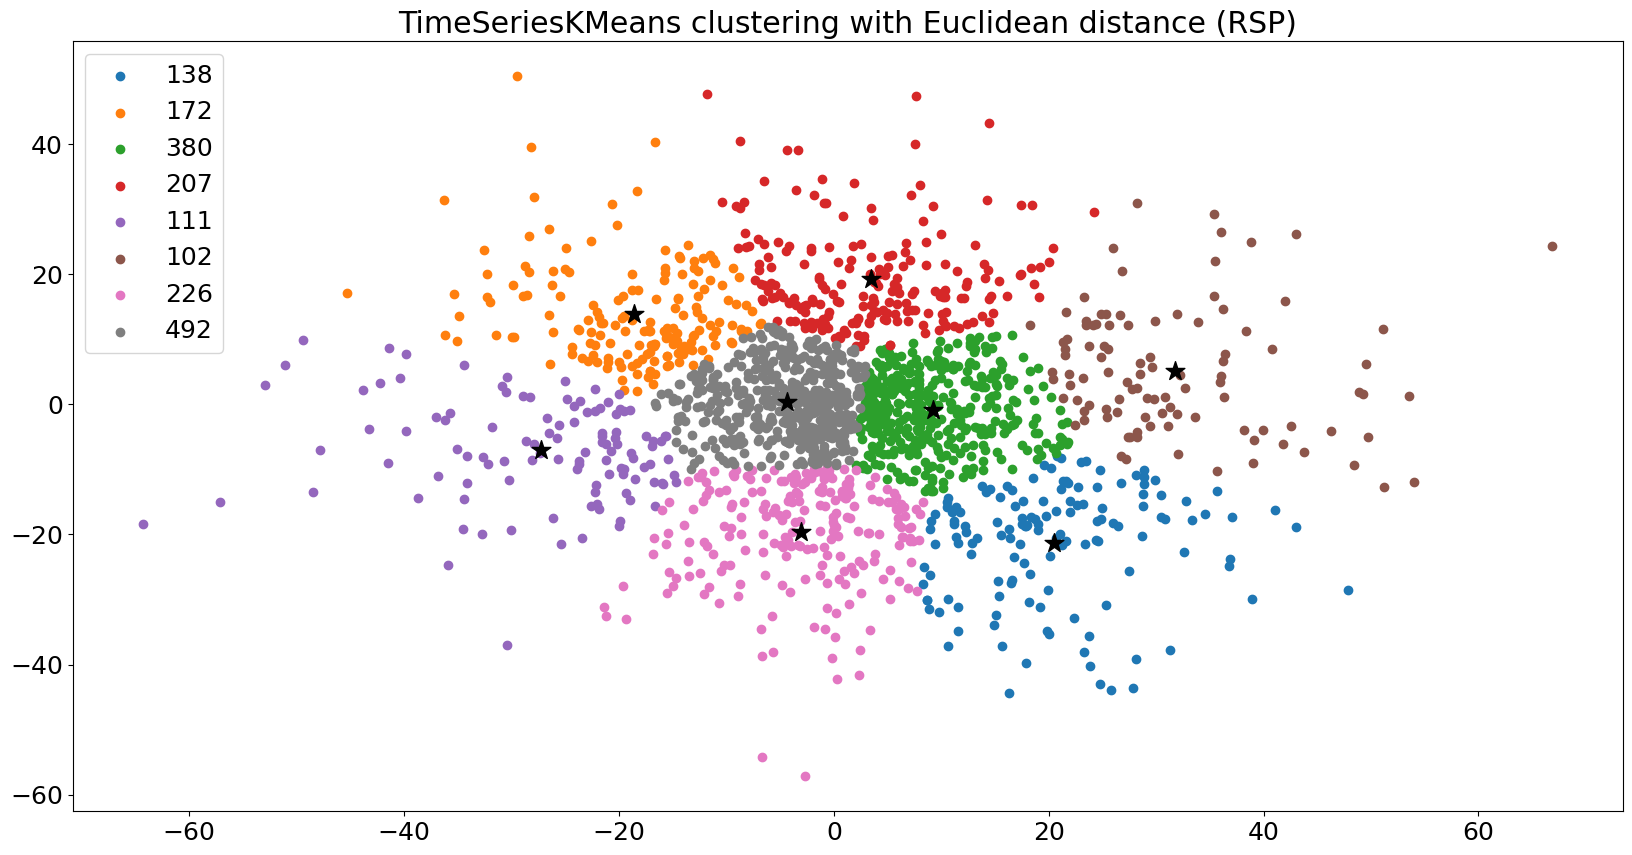

In [ ]:
#RAPPRESENTAZIONE RSP
#trovo i centroidi e le etichette
centroids = km.cluster_centers_
u_labels = np.unique(labels_rsp)

#stampo il grafico con i punti divisi in cluster e nella legenda il numero di punti in ongi cluster
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18
for i in u_labels:
    plt.scatter(X_train_rsp[labels_rsp == i , 0] , X_train_rsp[labels_rsp == i , 1] , label = len(labels_rsp[labels_rsp==i]))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("TimeSeriesKMeans clustering with Euclidean distance (RSP)")
plt.legend()
#plt.show()
plt.savefig("tskm_euclidean_1000_RSP.pdf")

## TSKM con Dinamic Time Warping

8 cluster, dataset da 100 perchè va lentissimo

In [ ]:
#faccio lo stesso TIMESERIESKMEANS ma con distanza DTW
#solo con X_train_100 perchè sennò divento vecchia
km = TimeSeriesKMeans(n_clusters=8,
                      metric="dtw",
                      max_iter=100,
                      random_state=0)
km.fit(X_train_100)

TimeSeriesKMeans(max_iter=100, metric='dtw', n_clusters=8, random_state=0)

In [ ]:
km.inertia_

9.25008787101049

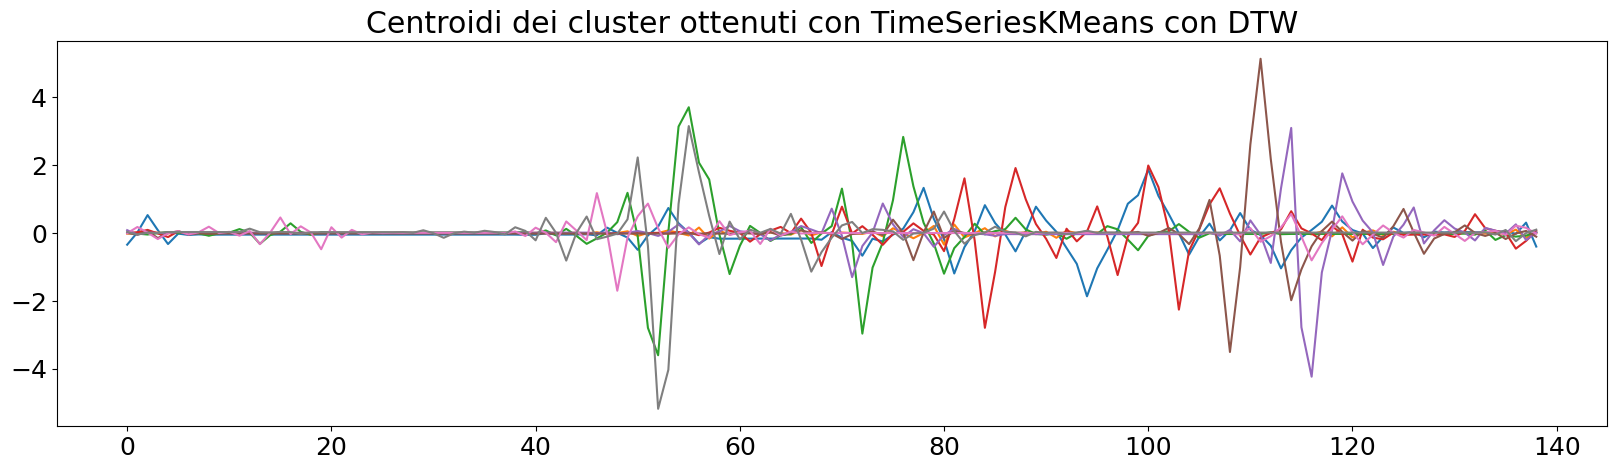

In [ ]:
plt.figure(figsize=(20,5))
plt.rcParams['font.size'] = 18
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.title("Centroidi dei cluster ottenuti con TimeSeriesKMeans con DTW")
plt.savefig("tskm_dtw_centers.pdf")

Visualizzo con PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_100)
X_train_100_pca = pca.transform(X_train_100)

In [ ]:
X_train_100_pca.shape

(1828, 2)

In [ ]:
#fitto per la rappresentazione con PCA
labels_pca = km.fit_predict(X_train_100_pca)

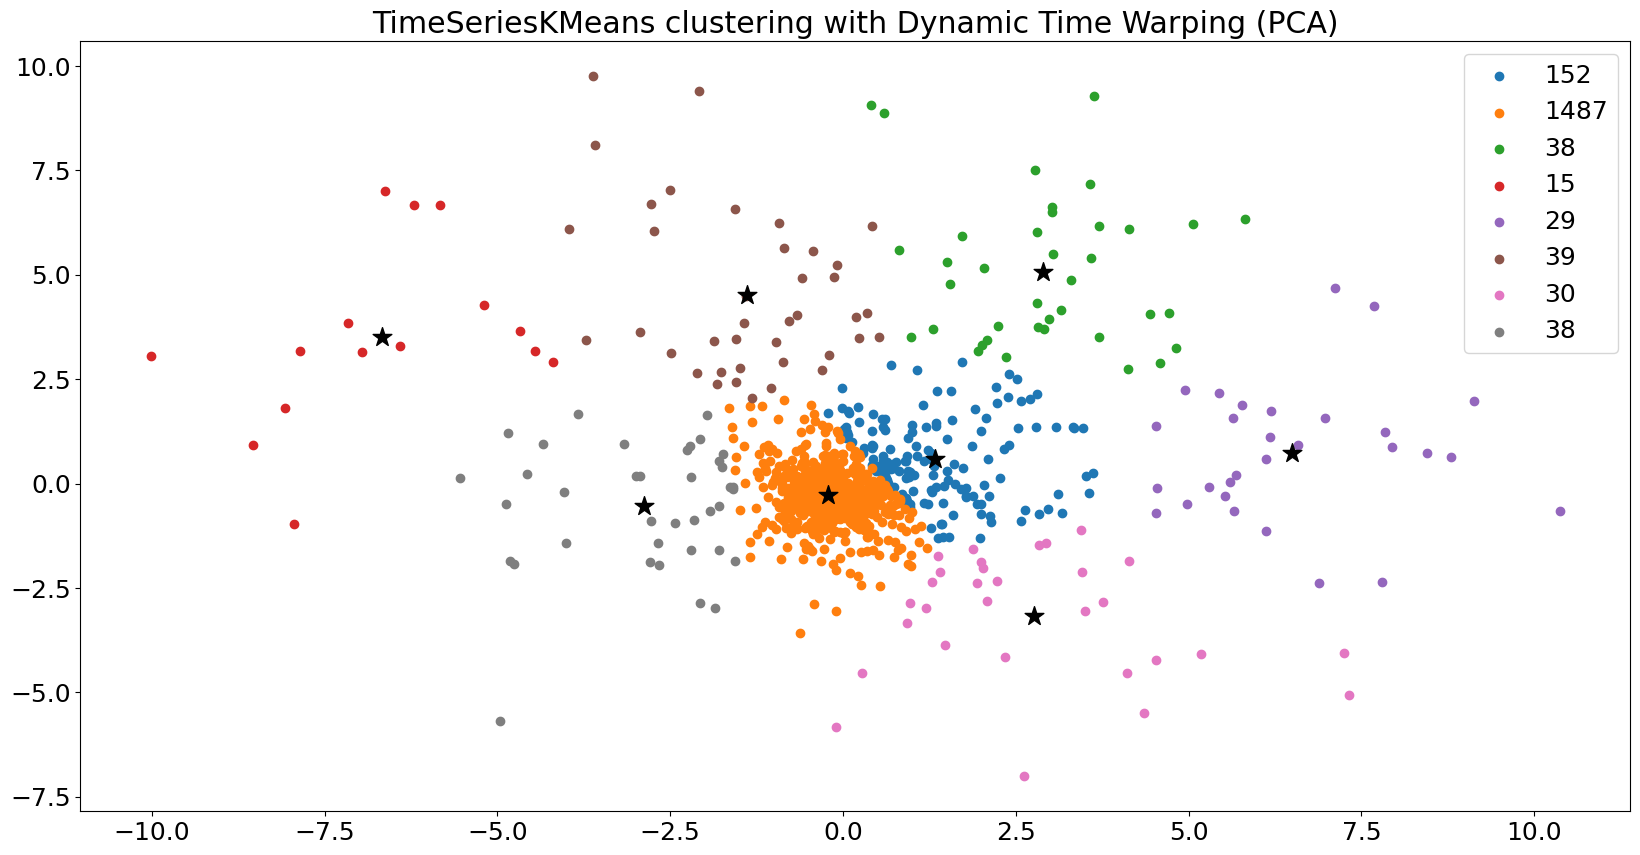

In [ ]:
#RAPPRESENTAZIONE PCA
#trovo i centroidi e le etichette
centroids = km.cluster_centers_
u_labels = np.unique(labels_pca)

#stampo il grafico con i punti divisi in cluster e nella legenda il numero di punti in ongi cluster
plt.figure(figsize=(20,10))
plt.rcParams["font.size"] = 18
for i in u_labels:
    plt.scatter(X_train_100_pca[labels_pca == i , 0] , X_train_100_pca[labels_pca == i , 1] , label = len(labels_pca[labels_pca==i]))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("TimeSeriesKMeans clustering with Dynamic Time Warping (PCA)")
plt.legend()
#plt.show()
plt.savefig("tskm_dtw_100_PCA.pdf")

Visualizzo con RSP

In [ ]:
from sklearn import random_projection
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(X_train_100)
X_train_rsp.shape

(1828, 2)

In [ ]:
#fitto per la rappresentazione con PCA
labels_rsp = km.fit_predict(X_train_rsp)

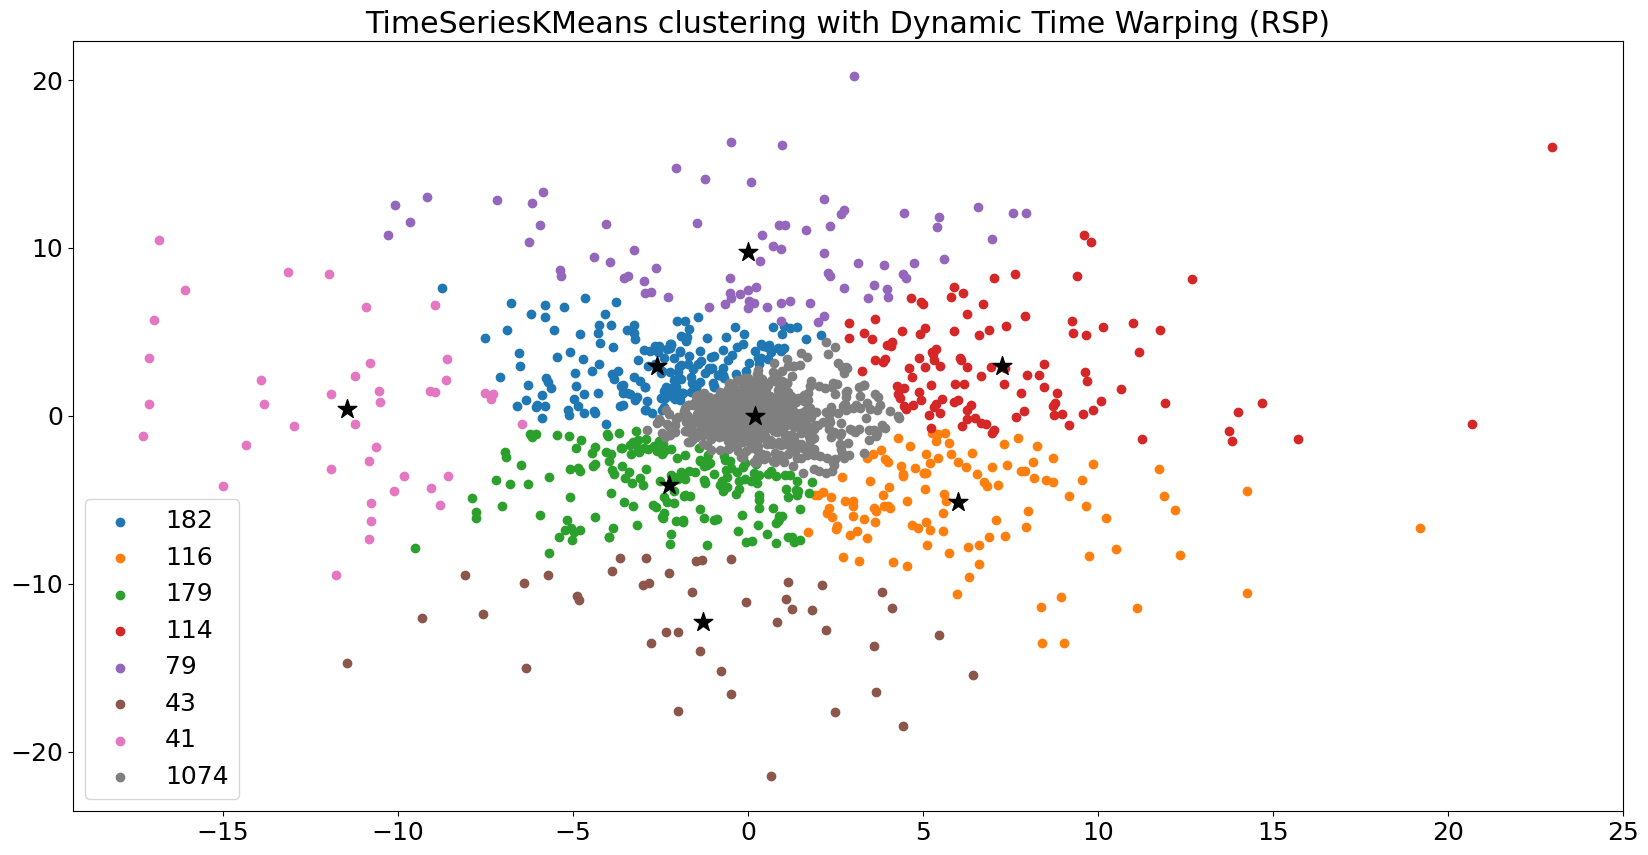

In [ ]:
#RAPPRESENTAZIONE RSP
#trovo i centroidi e le etichette
centroids = km.cluster_centers_
u_labels = np.unique(labels_rsp)

#stampo il grafico con i punti divisi in cluster e nella legenda il numero di punti in ongi cluster
plt.figure(figsize=(20,10))
plt.rcParams["font.size"] = 18
for i in u_labels:
    plt.scatter(X_train_rsp[labels_rsp == i , 0] , X_train_rsp[labels_rsp == i , 1] , label = len(labels_rsp[labels_rsp==i]))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("TimeSeriesKMeans clustering with Dynamic Time Warping (RSP)")
plt.legend()
#plt.show()
plt.savefig("tskm_dtw_100_RSP.pdf")

## KMeans con 100

8 cluster, dataset da 100 per vedere le differenze

In [ ]:
#imposto il clustering
km_100 = KMeans(n_clusters=8,
                max_iter=100,
                n_init="auto",
                random_state=0)
km_100.fit(X_train_100)

KMeans(max_iter=100, n_init='auto', random_state=0)

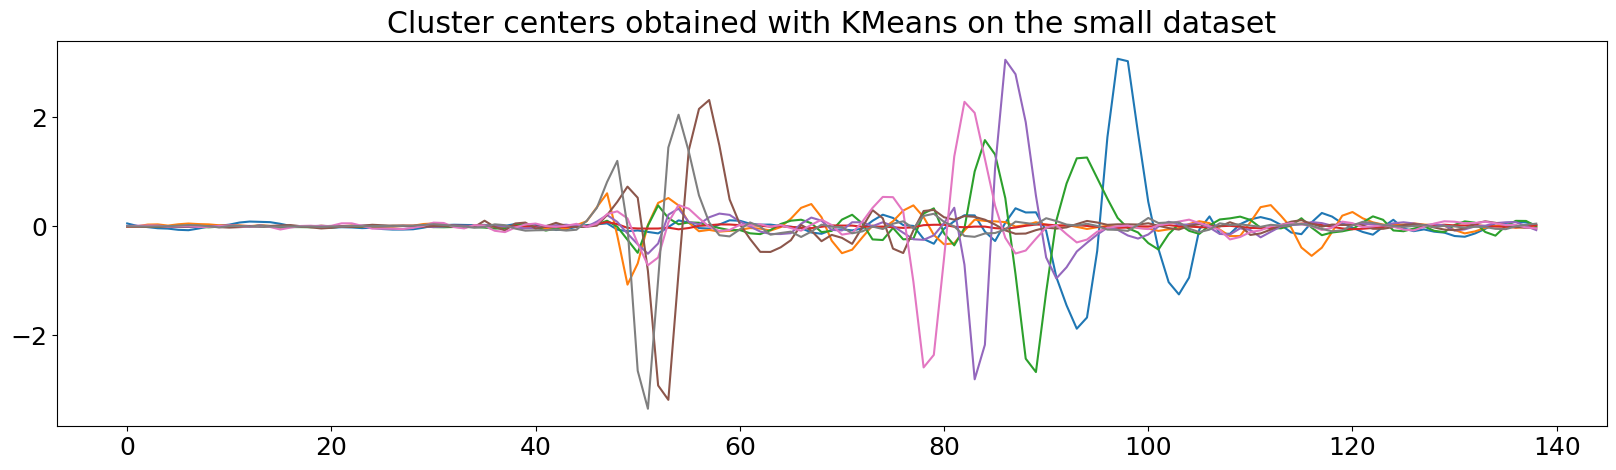

In [ ]:
plt.figure(figsize=(20,5))
plt.rcParams['font.size'] = 18
plt.plot(np.squeeze(km_100.cluster_centers_).T)
plt.title("Cluster centers obtained with KMeans on the small dataset")
plt.savefig("km_100_centers.pdf")

In [ ]:
km_100.inertia_

57593.63083773201

Visualizzo con PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_100)
X_train_100_pca = pca.transform(X_train_100)

In [ ]:
X_train_100_pca.shape

(1828, 2)

In [ ]:
#fitto per la rappresentazione con PCA
labels_pca = km_100.fit_predict(X_train_100_pca)

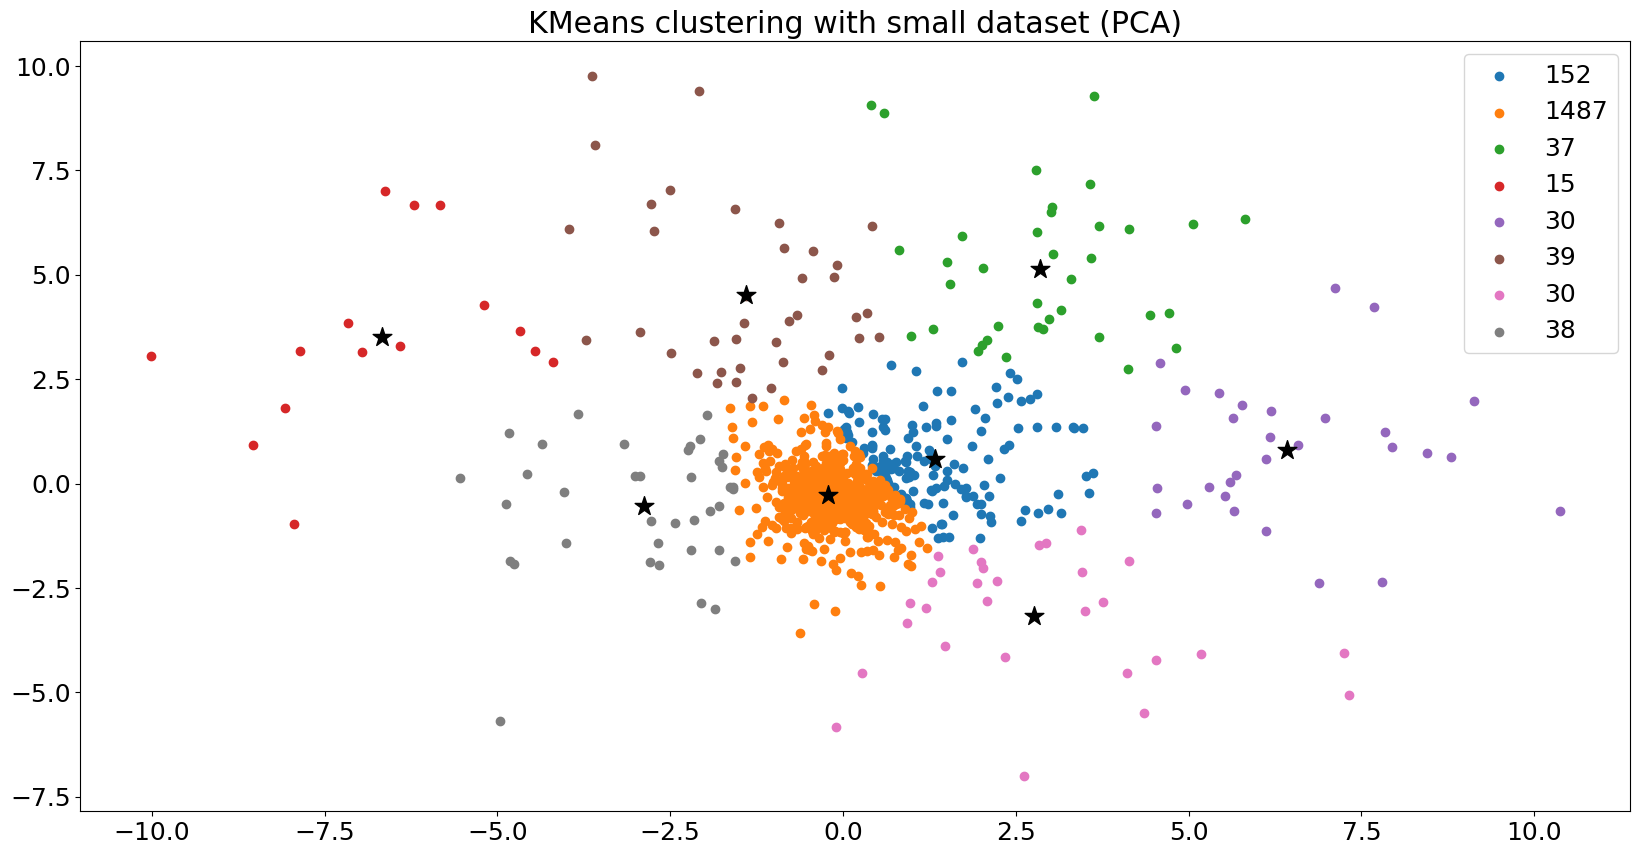

In [ ]:
#RAPPRESENTAZIONE PCA
#trovo i centroidi e le etichette
centroids = km_100.cluster_centers_
u_labels = np.unique(labels_pca)

#stampo il grafico con i punti divisi in cluster e nella legenda il numero di punti in ongi cluster
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18
for i in u_labels:
    plt.scatter(X_train_100_pca[labels_pca == i , 0] , X_train_100_pca[labels_pca == i , 1] , label = len(labels_pca[labels_pca==i]))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("KMeans clustering with small dataset (PCA)")
plt.legend()
# plt.show()
plt.savefig("km_100_PCA.pdf")

Visualizzo con RSP

In [ ]:
from sklearn import random_projection
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp_100 = rsp.fit_transform(X_train_100)
X_train_rsp_100.shape

(1828, 2)

In [ ]:
#fitto per la rappresentazione con RSP
labels_rsp = km_100.fit_predict(X_train_rsp_100)

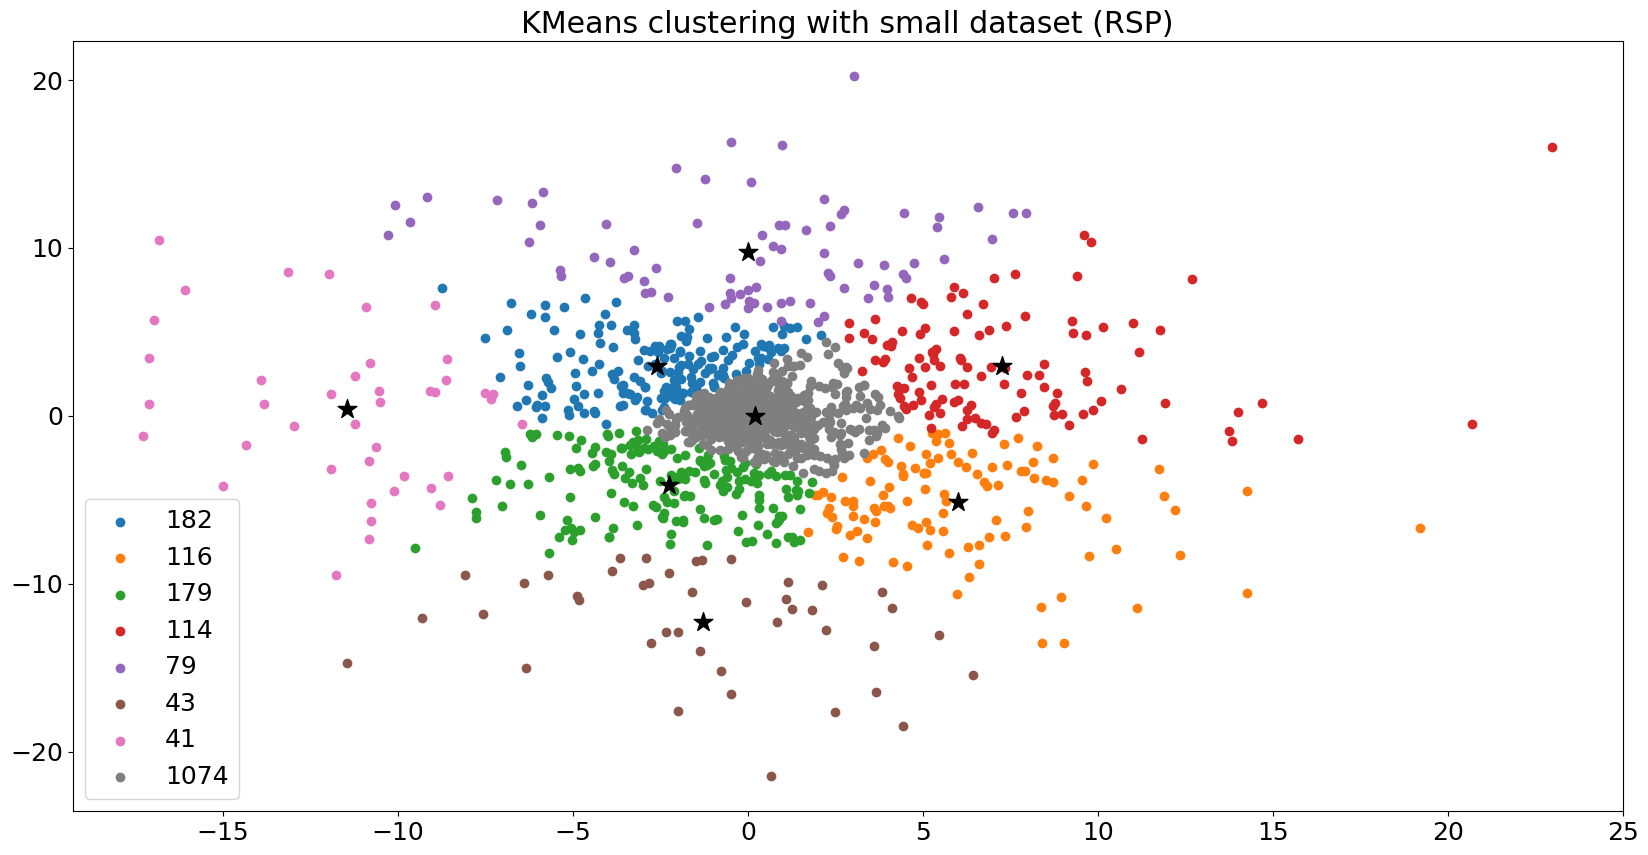

In [ ]:
#RAPPRESENTAZIONE RSP
#trovo i centroidi e le etichette
centroids = km_100.cluster_centers_
u_labels = np.unique(labels_rsp)

#stampo il grafico con i punti divisi in cluster e nella legenda il numero di punti in ongi cluster
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18
for i in u_labels:
    plt.scatter(X_train_rsp_100[labels_rsp == i , 0] , X_train_rsp_100[labels_rsp == i , 1] , label = len(labels_rsp[labels_rsp==i]))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("KMeans clustering with small dataset (RSP)")
plt.legend()
#plt.show()
plt.savefig("km_100_RSP.pdf")

## KMeans con 1000

8 cluster, dataset da 1000 per vedere le differenze

In [ ]:
#imposto il clustering
km_1000 = KMeans(n_clusters=8,
                max_iter=100,
                n_init="auto",
                random_state=0)
km_1000.fit(X_train)

KMeans(max_iter=100, n_init='auto', random_state=0)

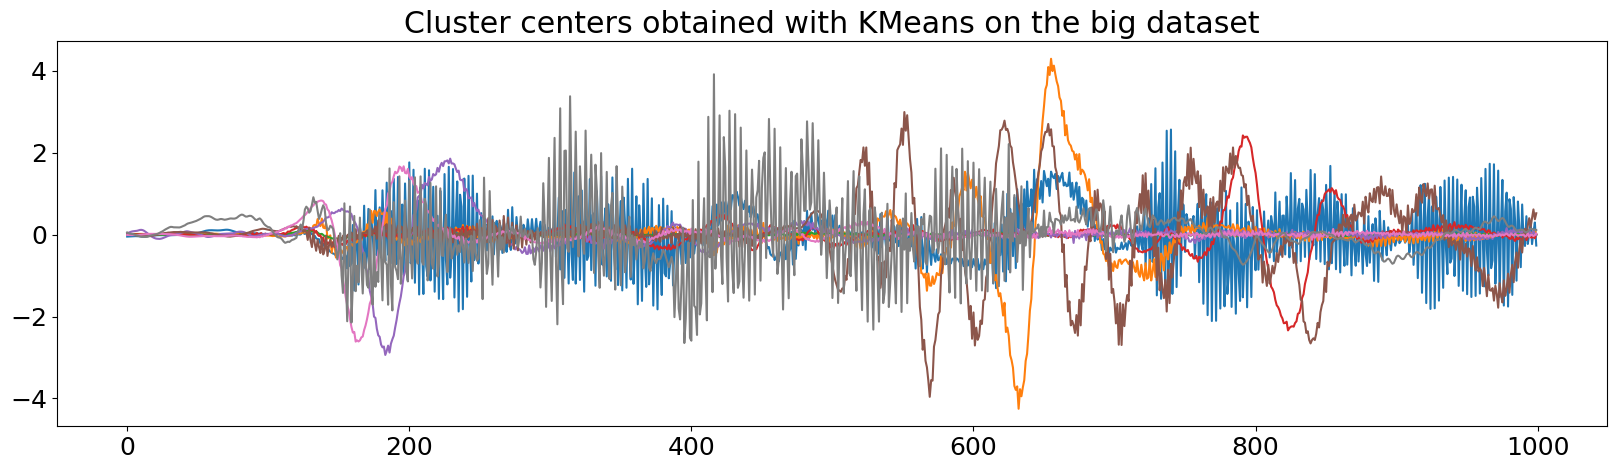

In [ ]:
plt.figure(figsize=(20,5))
plt.rcParams['font.size'] = 18
plt.plot(np.squeeze(km_1000.cluster_centers_).T)
plt.title("Cluster centers obtained with KMeans on the big dataset")
plt.savefig("km_1000_centers.pdf")

In [ ]:
km_1000.inertia_

821035.3380251279

Visualizzo con PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_1000_pca = pca.transform(X_train)

In [ ]:
X_train_1000_pca.shape

(1828, 2)

In [ ]:
#fitto per la rappresentazione con PCA
labels_pca = km_1000.fit_predict(X_train_1000_pca)

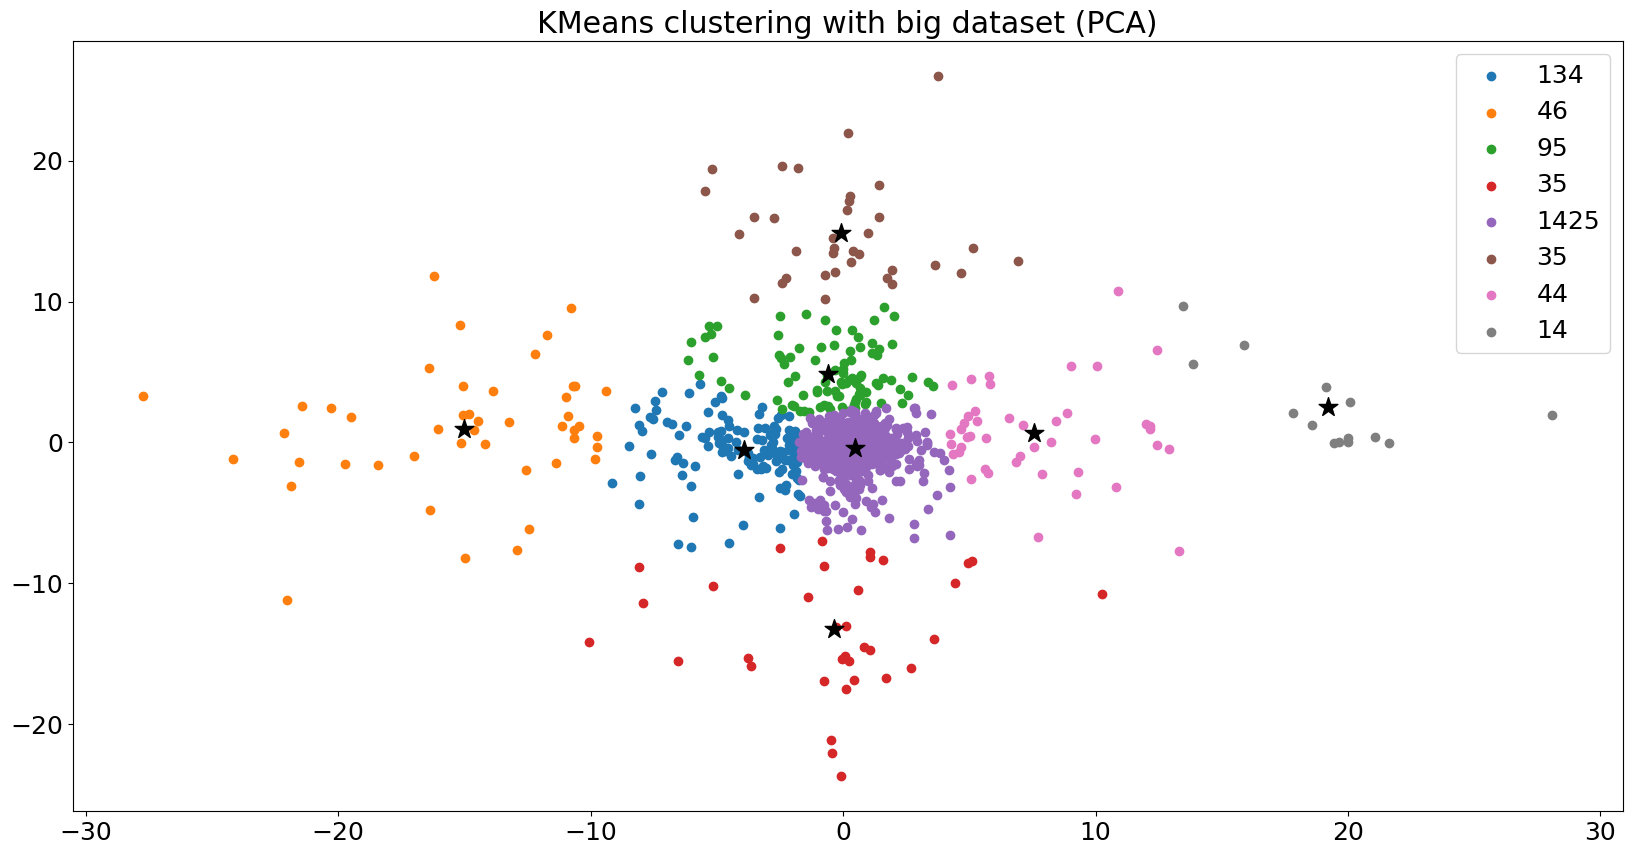

In [ ]:
#RAPPRESENTAZIONE PCA
#trovo i centroidi e le etichette
centroids = km_1000.cluster_centers_
u_labels = np.unique(labels_pca)

#stampo il grafico con i punti divisi in cluster e nella legenda il numero di punti in ongi cluster
plt.figure(figsize=(20,10))
for i in u_labels:
    plt.scatter(X_train_1000_pca[labels_pca == i , 0] , X_train_1000_pca[labels_pca == i , 1] , label = len(labels_pca[labels_pca==i]))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("KMeans clustering with big dataset (PCA)")
plt.legend()
# plt.show()
plt.savefig("km_1000_PCA.pdf")

Visualizzo con RSP

In [ ]:
from sklearn import random_projection
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp_1000 = rsp.fit_transform(X_train)
X_train_rsp_1000.shape

(1828, 2)

In [ ]:
#fitto per la rappresentazione con RSP
labels_rsp = km_1000.fit_predict(X_train_rsp_1000)

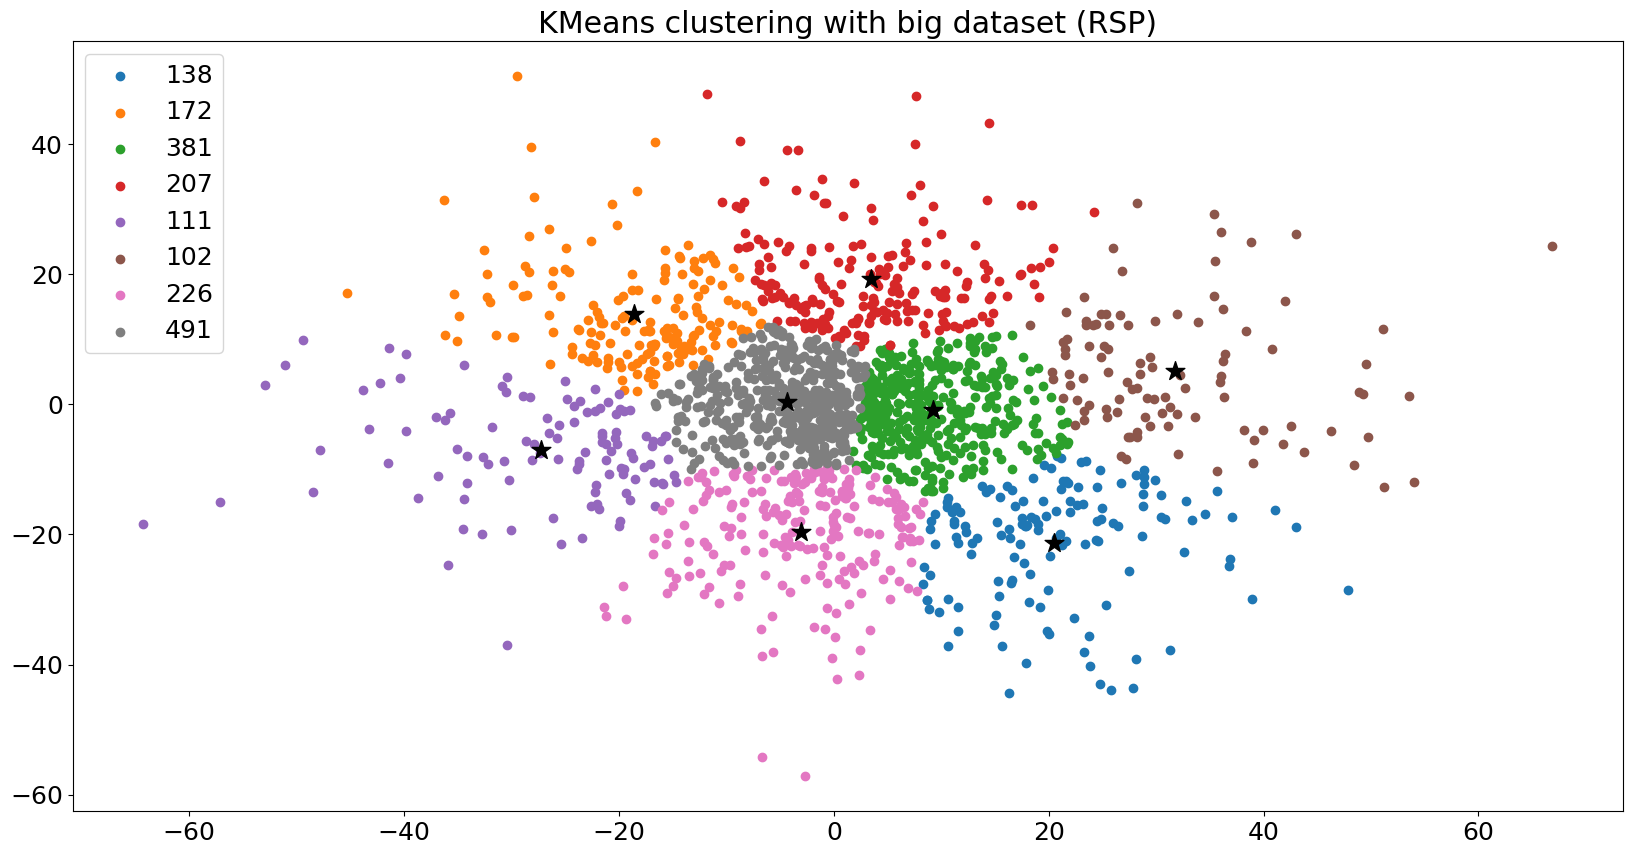

In [ ]:
#RAPPRESENTAZIONE RSP
#trovo i centroidi e le etichette
centroids = km_1000.cluster_centers_
u_labels = np.unique(labels_rsp)

#stampo il grafico con i punti divisi in cluster e nella legenda il numero di punti in ongi cluster
plt.figure(figsize=(20,10))
for i in u_labels:
    plt.scatter(X_train_rsp_1000[labels_rsp == i , 0] , X_train_rsp_1000[labels_rsp == i , 1] , label = len(labels_rsp[labels_rsp==i]))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("KMeans clustering with big dataset (RSP)")
plt.legend()
#plt.show()
plt.savefig("km_1000_RSP.pdf")

# Features-based Clustering

Estrazione delle features generali della time series

In [ ]:
#funzione loro per calcolare le features di ogni singola time series
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [ ]:
#mi faccio una lista con tutte le features delle ts di X_train
F = [list(calculate_features(x).values())[:-2] for x in X_train]

In [ ]:
#le uso nel KMeans
kmeans = KMeans(n_clusters=8,
                max_iter=100,
                n_init="auto",
                random_state=0)
kmeans.fit(F)

KMeans(max_iter=100, n_init='auto', random_state=0)

In [ ]:
kmeans.inertia_

80.01506950512689

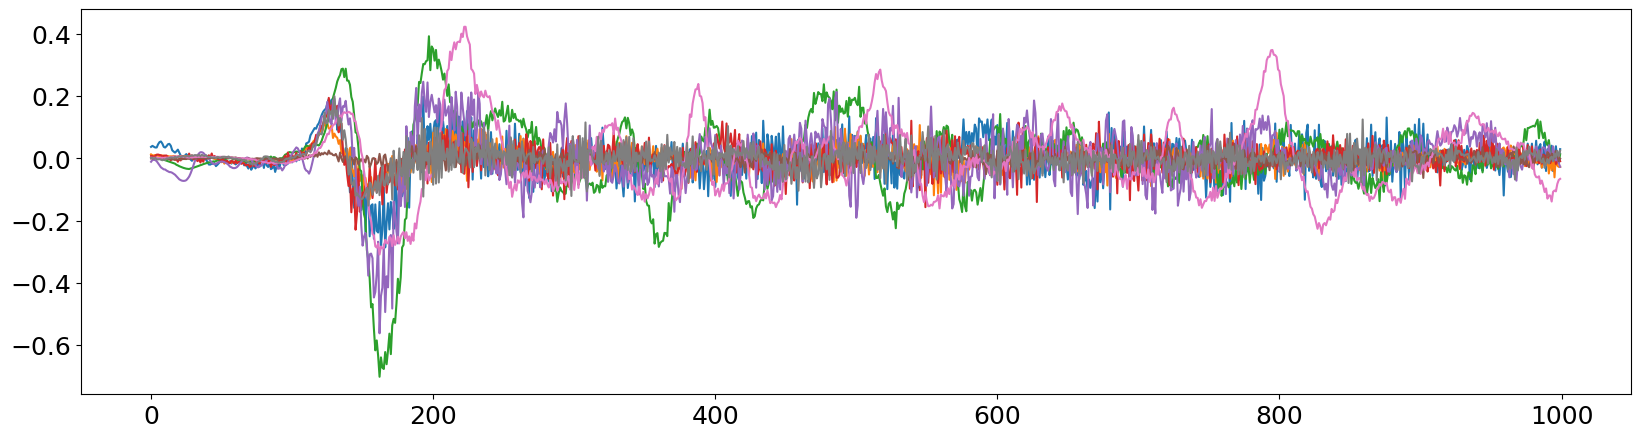

In [ ]:
plt.figure(figsize=(20,5))
for i in range(8):
    plt.plot(np.mean(X_train[np.where(kmeans.labels_ == i)[0]], axis=0))
plt.show()

Visualizzo con PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(F)
X_train_pca = pca.transform(F)

In [ ]:
X_train_pca.shape

(1828, 2)

In [ ]:
#fitto per la rappresentazione con PCA
labels_pca = kmeans.fit_predict(X_train_pca)

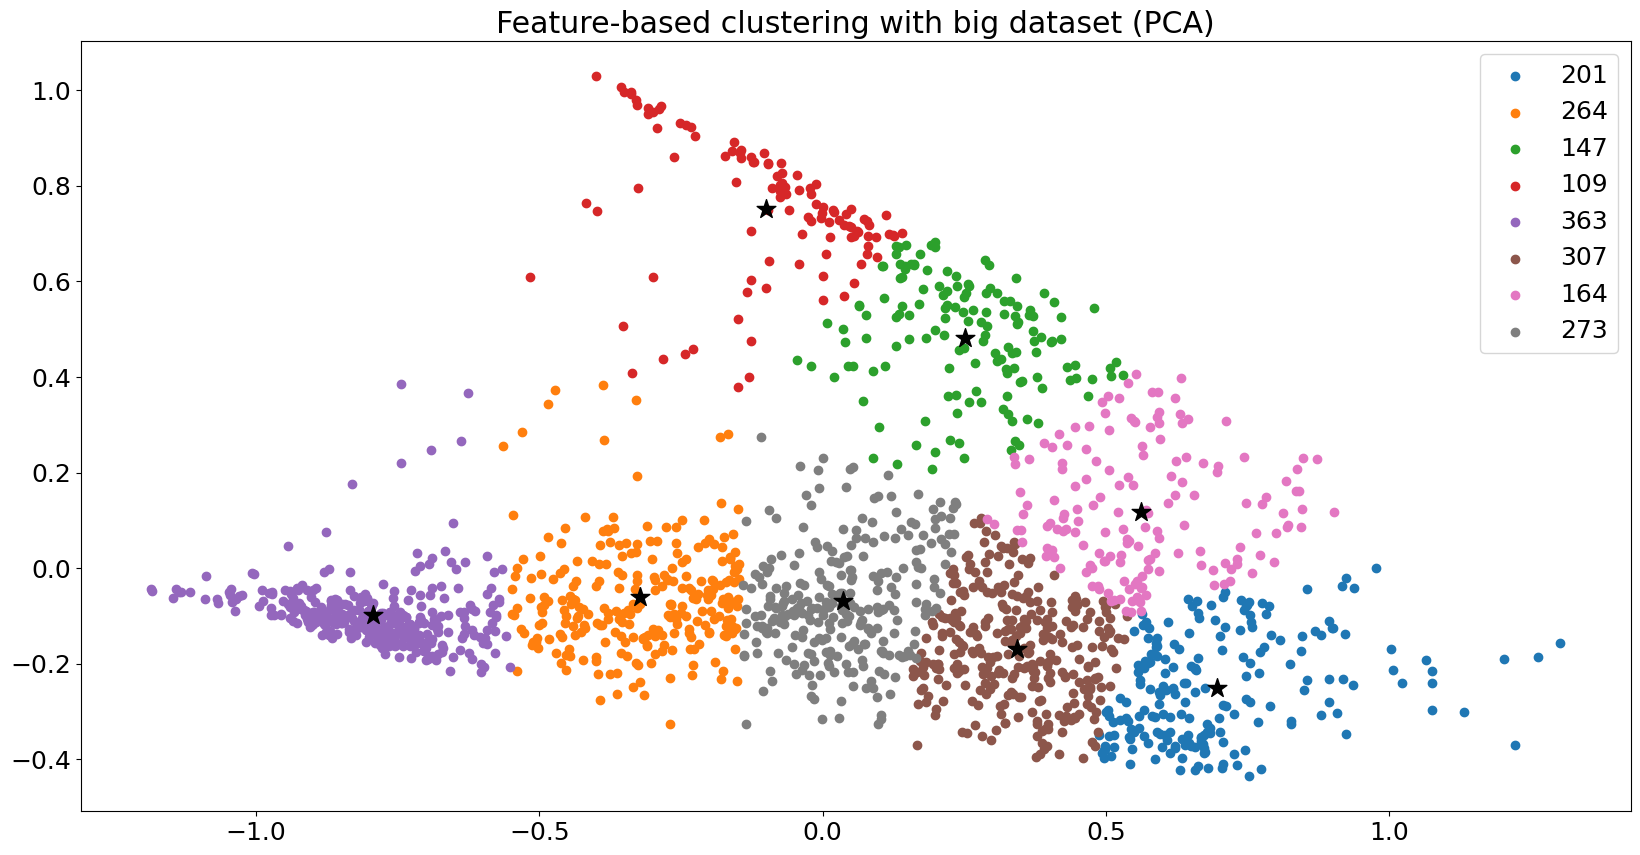

In [ ]:
#RAPPRESENTAZIONE PCA
#trovo i centroidi e le etichette
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels_pca)

#stampo il grafico con i punti divisi in cluster e nella legenda il numero di punti in ongi cluster
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18

for i in u_labels:
    plt.scatter(X_train_pca[labels_pca == i , 0] , X_train_pca[labels_pca == i , 1] , label = len(labels_pca[labels_pca==i]))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("Feature-based clustering with big dataset (PCA)")
plt.legend()
# plt.show()
plt.savefig("feat-based_1000_PCA.pdf")

Visualizzo con RSP

In [ ]:
from sklearn import random_projection
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(F)
X_train_rsp.shape

(1828, 2)

In [ ]:
#fitto per la rappresentazione con PCA
labels_rsp = kmeans.fit_predict(X_train_rsp)

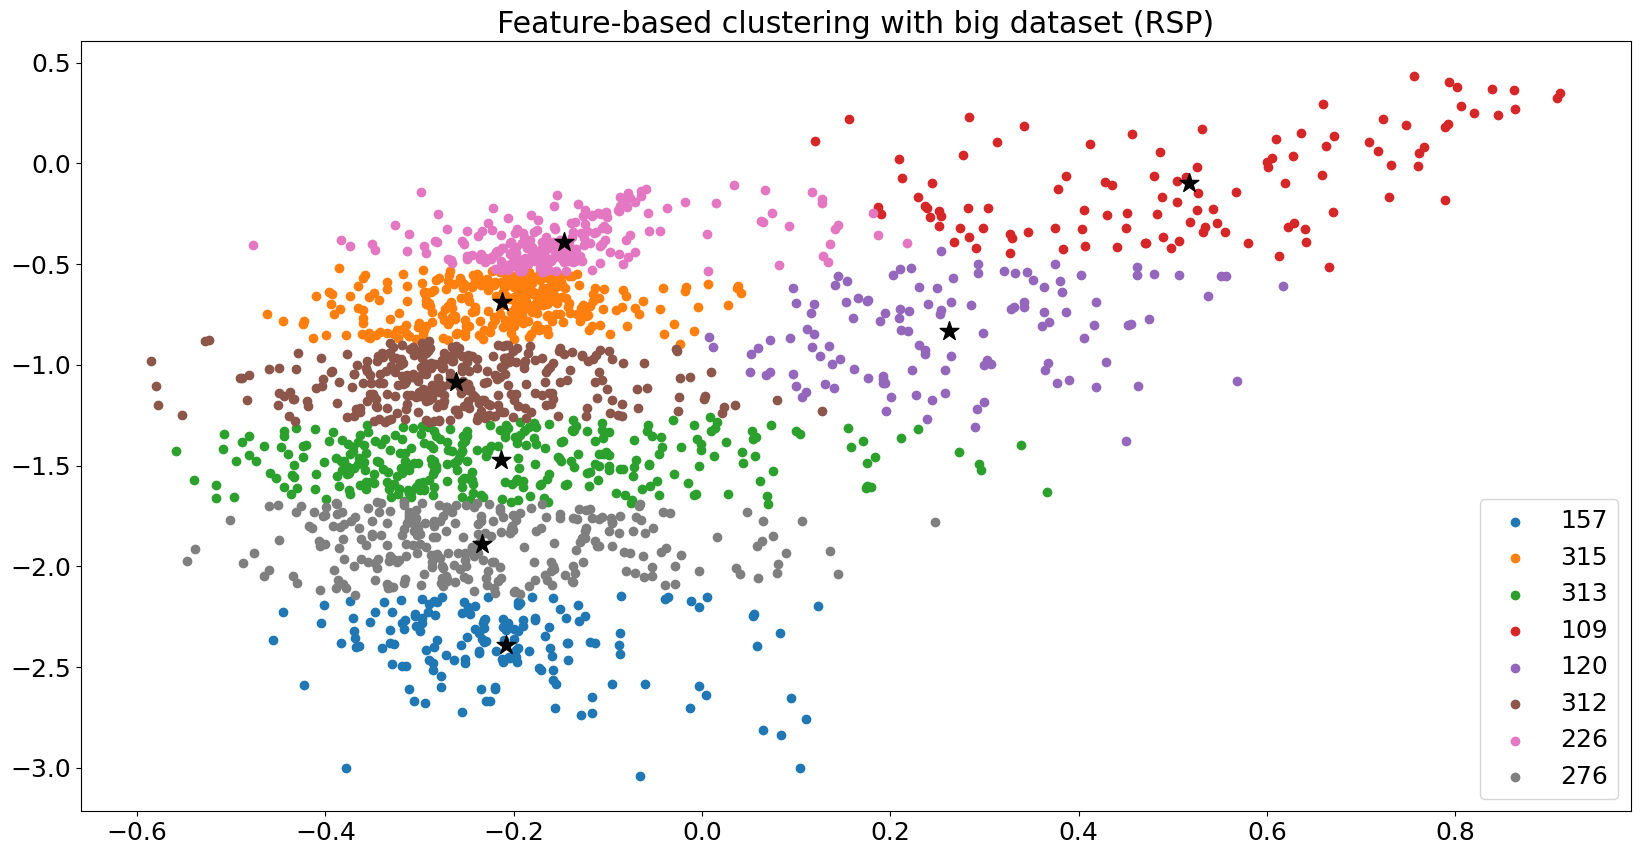

In [ ]:
#RAPPRESENTAZIONE RSP
#trovo i centroidi e le etichette
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels_rsp)

#stampo il grafico con i punti divisi in cluster e nella legenda il numero di punti in ongi cluster
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18

for i in u_labels:
    plt.scatter(X_train_rsp[labels_rsp == i , 0] , X_train_rsp[labels_rsp == i , 1] , label = len(labels_rsp[labels_rsp==i]))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("Feature-based clustering with big dataset (RSP)")
plt.legend()
#plt.show()
plt.savefig("feat-based_1000_RSP.pdf")

# Compression based Clustering

In [11]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [12]:
#20 min circa
M = pairwise_distances(X_train_100.reshape(X_train_100.shape[0], X_train_100.shape[1]),
                       metric=cdm_dist)

In [13]:
M.shape

(1828, 1828)

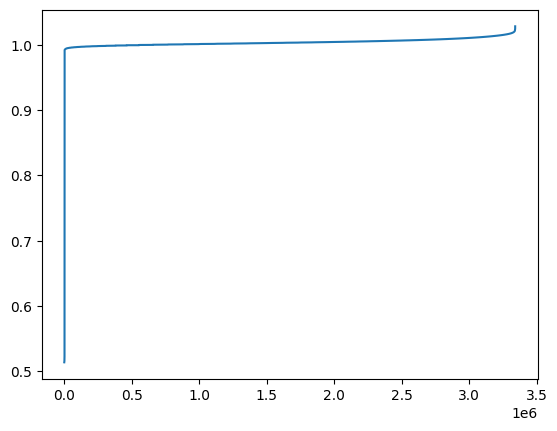

In [14]:
#ravel() = A 1-D array, containing the elements of the input, is returned.
plt.plot(sorted(M.ravel()))
plt.show()

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
db = DBSCAN(eps=1, min_samples=100, metric='euclidean')
db.fit(M)

DBSCAN(eps=1, min_samples=100)

In [17]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

Visualizzo con PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(M)
X_train_pca = pca.transform(M)

In [19]:
X_train_pca.shape

(1828, 2)

In [20]:
#fitto per la rappresentazione con PCA
labels_pca = db.fit_predict(X_train_pca)

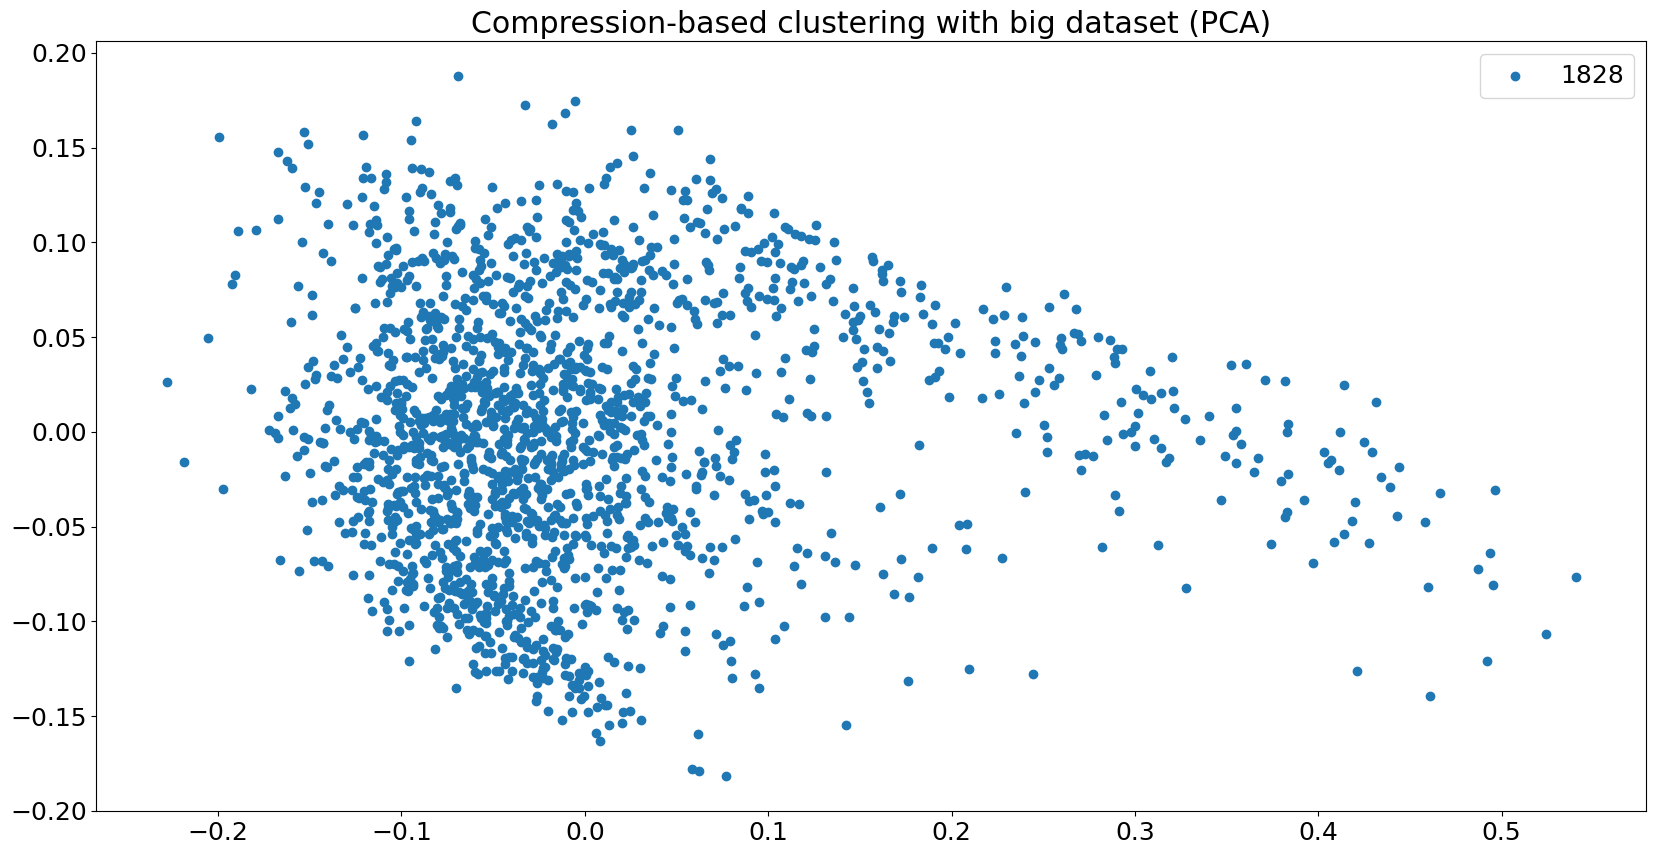

In [21]:
#RAPPRESENTAZIONE PCA
#trovo i centroidi e le etichette
# centroids = .cluster_centers_
u_labels = np.unique(labels_pca)

#stampo il grafico con i punti divisi in cluster e nella legenda il numero di punti in ongi cluster
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18

for i in u_labels:
    plt.scatter(X_train_pca[labels_pca == i , 0] , X_train_pca[labels_pca == i , 1] , label = len(labels_pca[labels_pca==i]))
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("Compression-based clustering with big dataset (PCA)")
plt.legend()
# plt.show()
plt.savefig("compr-based_1000_PCA.pdf")

Visualizzo con RSP

In [22]:
from sklearn import random_projection
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(M)
X_train_rsp.shape

(1828, 2)

In [23]:
#fitto per la rappresentazione con PCA
labels_rsp = db.fit_predict(X_train_rsp)

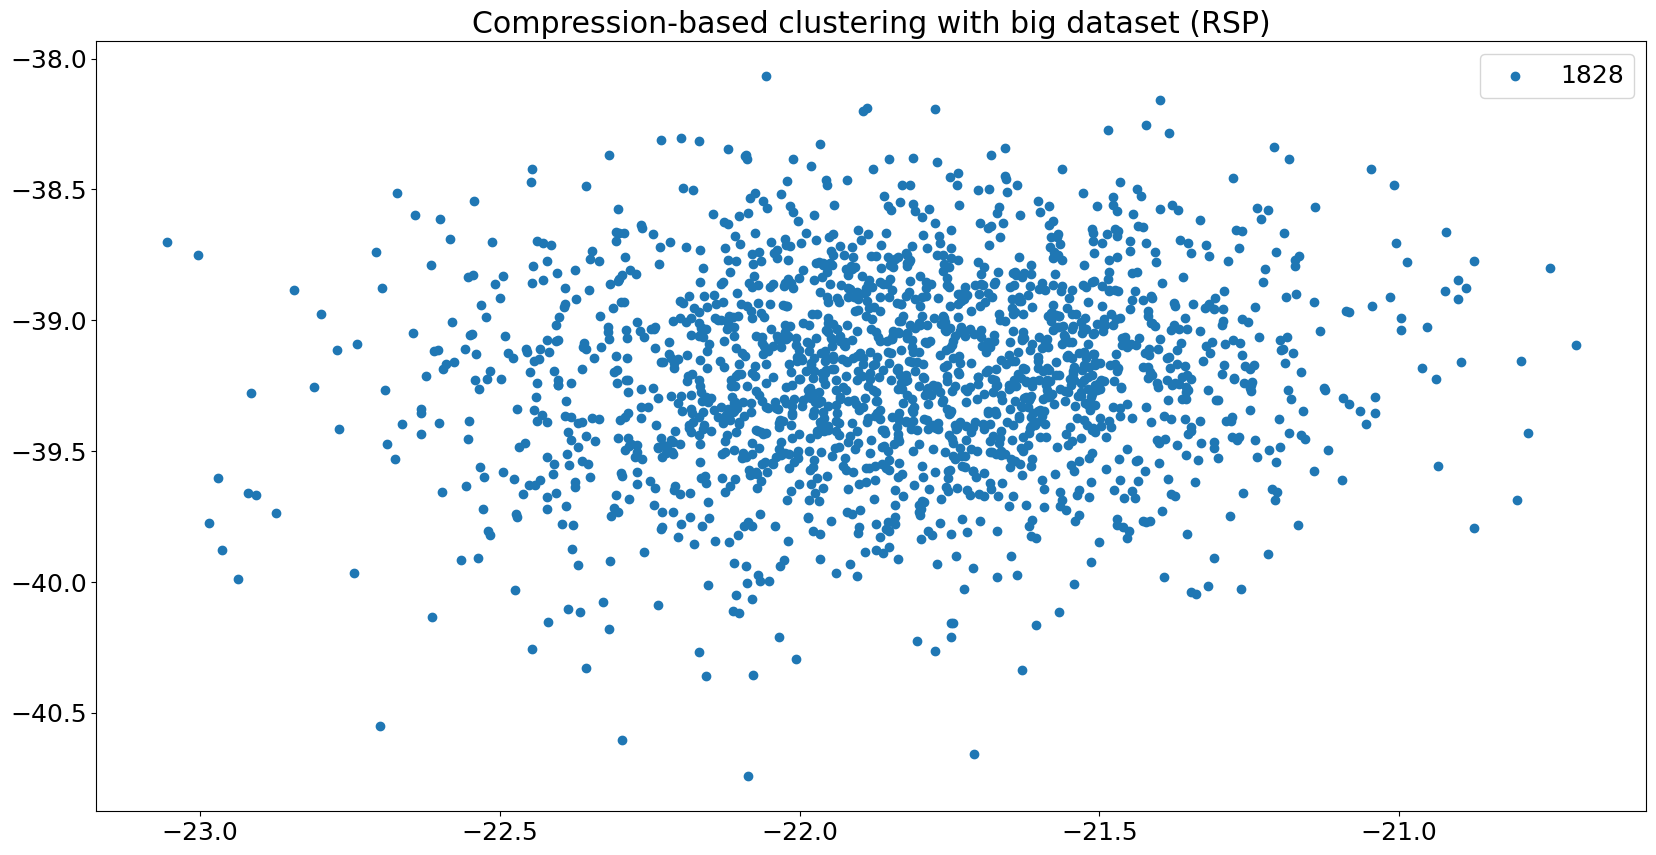

In [25]:
#RAPPRESENTAZIONE RSP
#trovo i centroidi e le etichette
# centroids = db.cluster_centers_
u_labels = np.unique(labels_rsp)

#stampo il grafico con i punti divisi in cluster e nella legenda il numero di punti in ongi cluster
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18

for i in u_labels:
    plt.scatter(X_train_rsp[labels_rsp == i , 0] , X_train_rsp[labels_rsp == i , 1] , label = len(labels_rsp[labels_rsp==i]))
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("Compression-based clustering with big dataset (RSP)")
plt.legend()
#plt.show()
plt.savefig("compr-based_1000_RSP.pdf")

provo con OPTICS

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
op = OPTICS(min_samples=10, metric='euclidean', p=2)
op.fit(M)
labels = op.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 0
